In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [118]:
df=pd.read_csv("walmart.csv")

In [119]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [120]:
df.shape

(6435, 8)

In [121]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [122]:
df['year'] = pd.DatetimeIndex(df['Date']).year #Separating year data.

In [123]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010


### Let’s delve into how various factors are positively and negatively correlated with weekly sales:

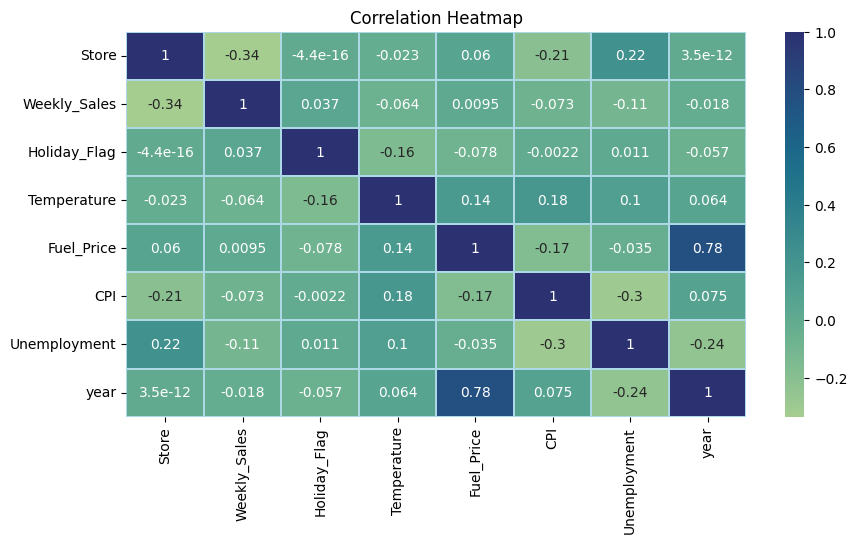

In [144]:
plt.figure(figsize=(10, 5)) 
sns.heatmap(df.corr(),cmap="crest", linewidth=.10, linecolor='LightBlue',annot=True)
plt.title('Correlation Heatmap')
plt.show()


**Weekly Sales vs Store (-0.34):**

*There is a moderate negative correlation between the store and weekly sales. This could indicate that certain stores may have lower overall sales compared to others.*
** ********************************** **

**Weekly Sales vs Holiday Flag (0.037):**

*There is a very weak positive correlation between the holiday flag and weekly sales. This suggests that there is little to no impact of holidays on weekly sales.*
**********************************************************

**Weekly Sales vs Temperature (-0.064):**

*There is a very weak negative correlation between temperature and weekly sales. This implies that temperature has little to no effect on weekly sales.*

********************************************************************************

**Weekly Sales vs Fuel Price (0.0095):**

*There is a very weak positive correlation between fuel price and weekly sales. This suggests that there is little to no impact of fuel price on weekly sales.*

***********************************************************************************

**Weekly Sales vs CPI (-0.073):**

*There is a very weak negative correlation between Consumer Price Index (CPI) and weekly sales. This implies that CPI has little to no effect on weekly sales.*

************************************************************************************

**Weekly Sales vs Unemployment (-0.11):**

*There is a weak negative correlation between unemployment and weekly sales. This suggests that higher unemployment rates may be associated with slightly lower weekly sales.*

**************************************************************************************

**Weekly Sales vs Year (-0.018):**

*There is a very weak negative correlation between the year and weekly sales. This suggests that there is little to no impact of the year on weekly sales.*

****************************************************************************************

### Visualizing the distribution of Weekly Sales:

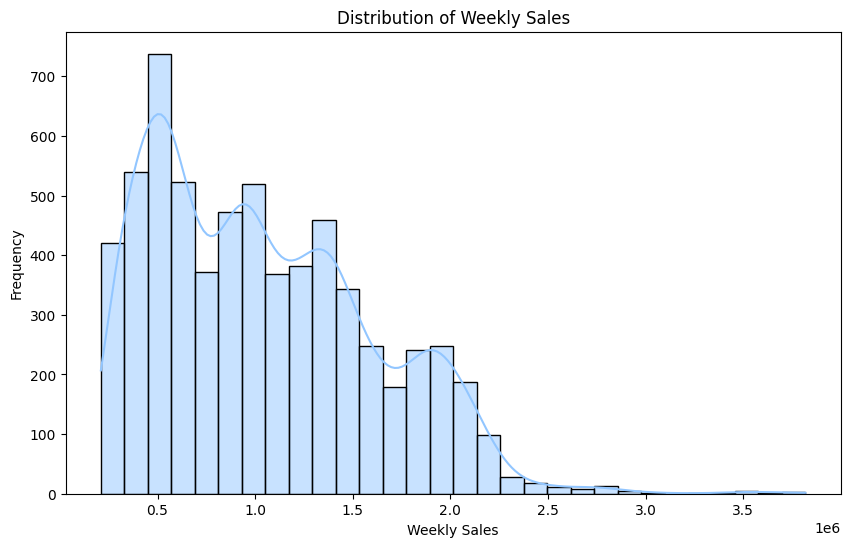

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

### Average Weekly Sales by Store:

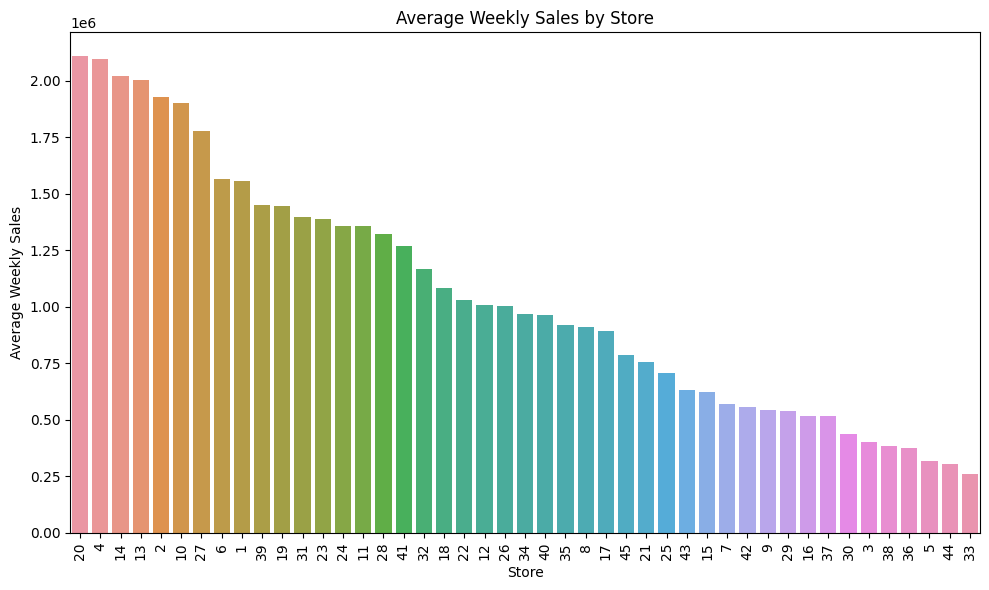

In [145]:
plt.figure(figsize=(10, 6))
avg_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_store, x='Store', y='Weekly_Sales', 
            order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

### Insight: The top 5 stores with high average weekly sales are 20,4,14,13,2

### Year vs Fuel_price

Text(0.5, 1.0, 'Year vs Fuel_price')

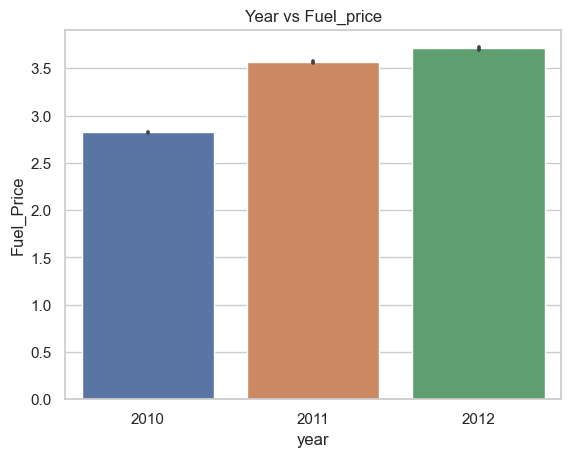

In [150]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="year", y="Fuel_Price", data=df)
plt.title("Year vs Fuel_price")

### Effect of Unemployment Rate on Weekly Sales:

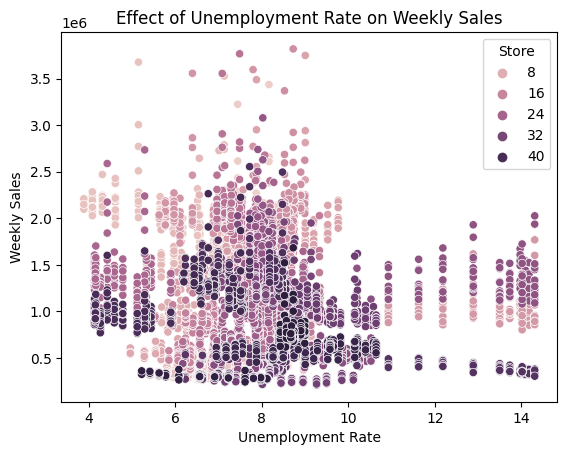

In [99]:

unemployment_correlation = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2,-1].reset_index()
stores_most_affected = unemployment_correlation[unemployment_correlation['Unemployment'] < 0]['Store']


sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', hue='Store')
plt.title('Effect of Unemployment Rate on Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()



### Effect of Temperature on Weekly Sales:
************************************************

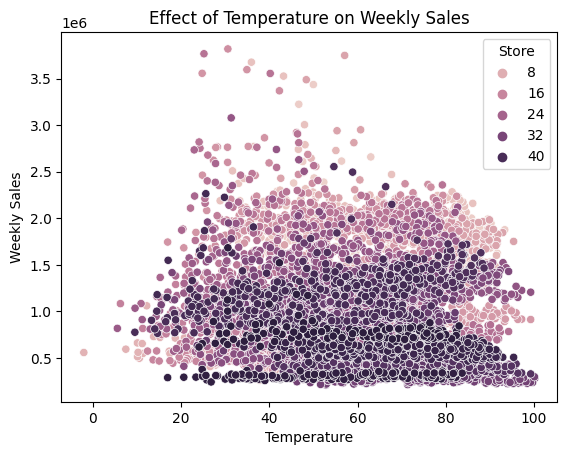

In [147]:
temperature_correlation = df.groupby('Store')['Weekly_Sales', 'Temperature'].corr().iloc[0::2,-1].reset_index()
stores_temperature_correlation = temperature_correlation[temperature_correlation['Temperature'] > 0]['Store']
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store')
plt.title('Effect of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


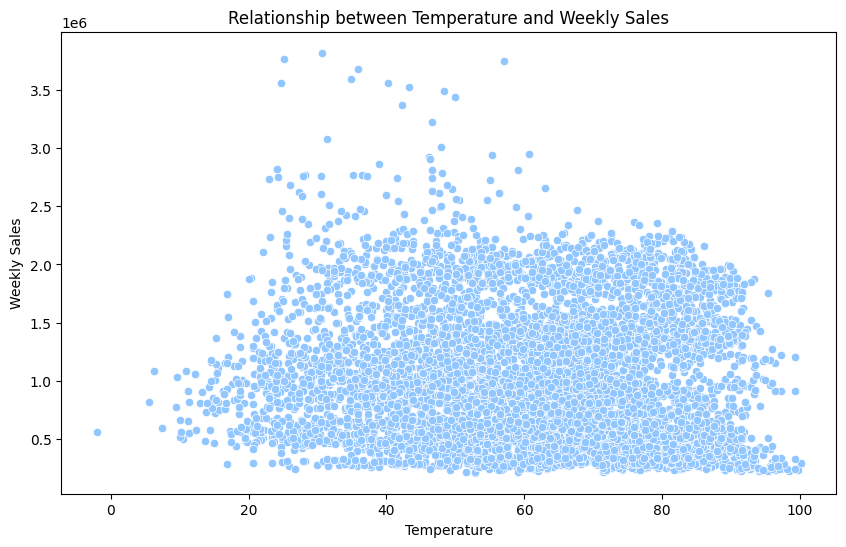

Correlation Coefficient: -0.06381001317946962


In [149]:
# Calculate correlation coefficient
correlation_coefficient = df['Temperature'].corr(df['Weekly_Sales'])

# Visualize the relationship between temperature and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")


The value of -0.064 indicates the strength of the correlation. Since it is close to zero, it suggests that the relationship between temperature and weekly sales is very weak.
Given this correlation coefficient, it seems that temperature has only a minimal effect, if any, on weekly sales.

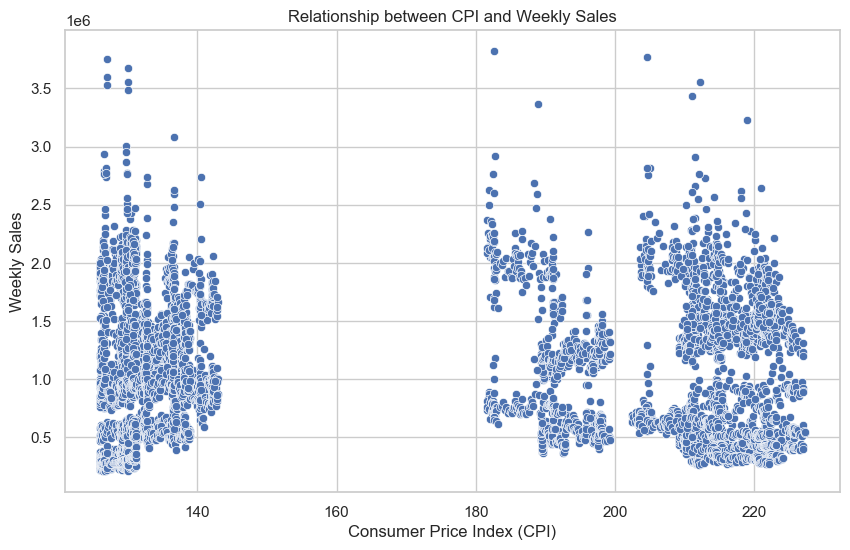

Correlation Coefficient: -0.07263416204017645


In [153]:
# Calculate correlation coefficient
correlation_coefficient = df['CPI'].corr(df['Weekly_Sales'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('Relationship between CPI and Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")


The correlation coefficient between the Consumer Price Index (CPI) and weekly sales is -0.073, indicating a very weak negative correlation. This suggests that there is little to no direct impact of the Consumer Price Index on weekly sales of various stores.

***The worst performing store, and how significant is the difference between the highest and lowest performing stores:***

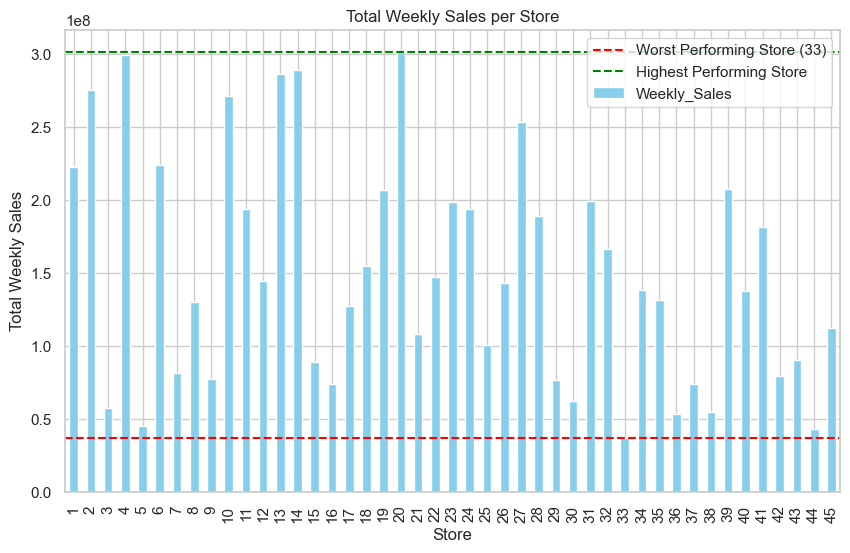

Difference between highest and lowest total weekly sales: 264237570.49999997
The worst performing store is : 33


In [157]:
# Calculate total weekly sales for each store
total_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

# Find the worst performing store (store with the lowest total weekly sales)
worst_store = total_sales_per_store.idxmin()

# Find the highest and lowest total weekly sales
lowest_sales = total_sales_per_store.min()
highest_sales = total_sales_per_store.max()

# Visualize the differences in total weekly sales
plt.figure(figsize=(10, 6))
total_sales_per_store.plot(kind='bar', color='skyblue')
plt.axhline(y=lowest_sales, color='red', linestyle='--', label=f'Worst Performing Store ({worst_store})')
plt.axhline(y=highest_sales, color='green', linestyle='--', label='Highest Performing Store')
plt.title('Total Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Calculate the difference between the highest and lowest total weekly sales
difference = highest_sales - lowest_sales
print(f"Difference between highest and lowest total weekly sales: {difference}")
print("The worst performing store is :", worst_store)


### Weekly Sales vs Store:
## ************************************** ##

Text(0.5, 1.0, 'Weekly sales vs Store')

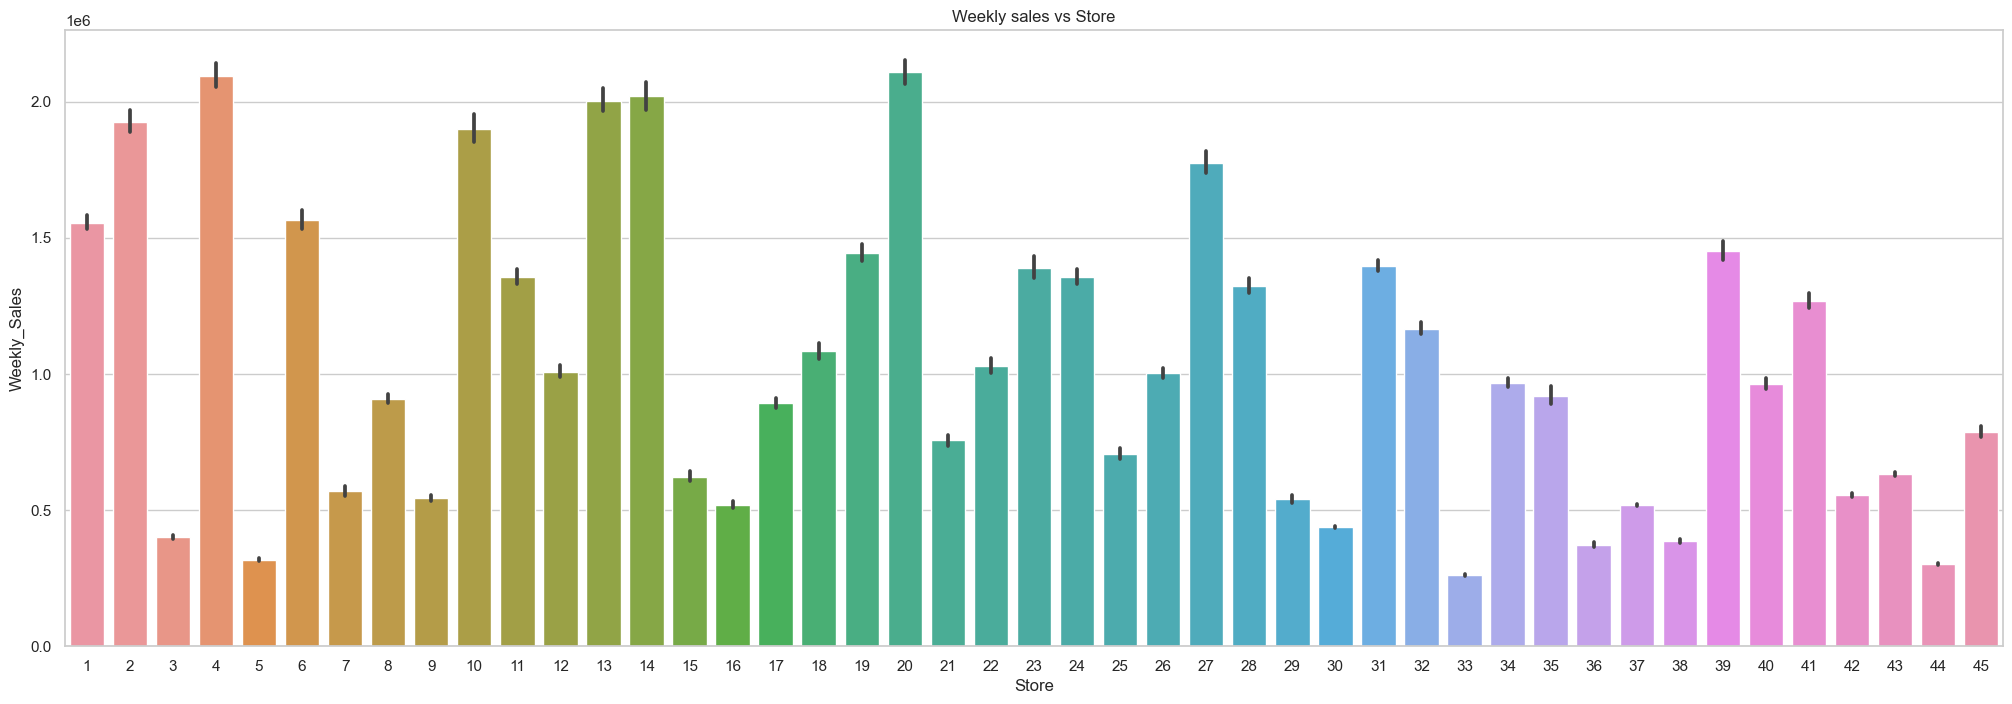

In [200]:
#sns.set_theme(style="whitegrid")
tips = df
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)
plt.title("Weekly sales vs Store")

### Store vs Unemployment

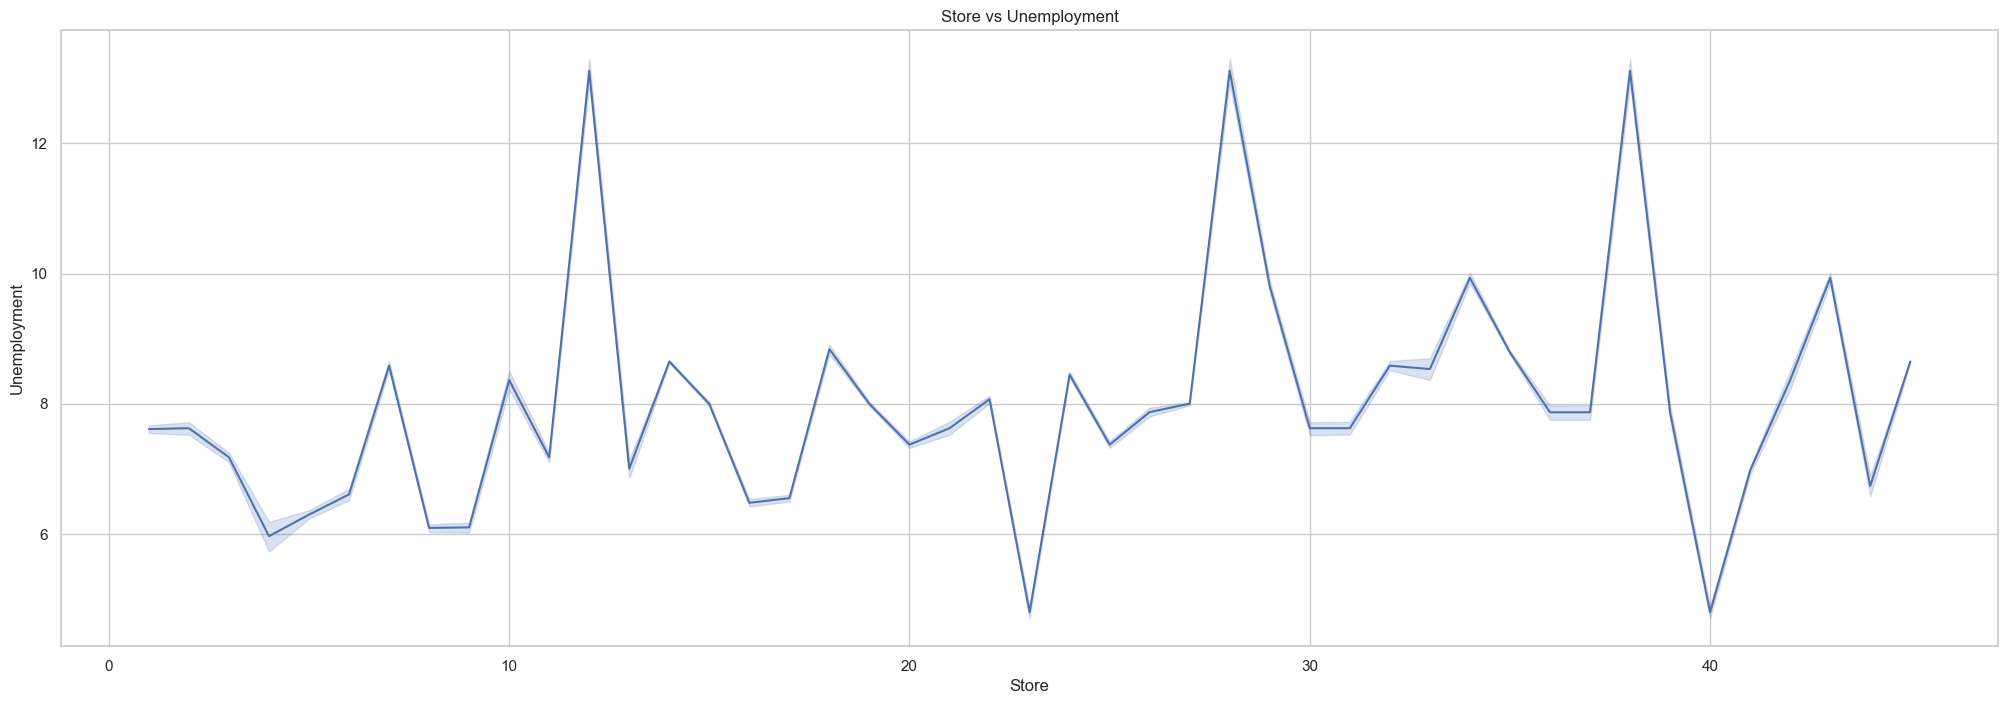

In [201]:
# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=df)
plt.title("Store vs Unemployment")
plt.show()

In [203]:
#extract month data
df['month'] = pd.DatetimeIndex(df['Date']).month

In [204]:
#extract week data
df['week'] = pd.DatetimeIndex(df['Date']).week

In [205]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


In [206]:
df["week"].unique()

array([17, 48,  7,  8, 18, 11, 12,  5, 35, 15, 16, 27, 19, 20, 21, 14, 44,
       24, 25, 36, 28, 29, 30, 23, 32, 33, 34, 10, 40, 37, 38,  1, 41, 42,
       43, 49, 46, 47, 50, 51, 52, 26,  2,  3,  4, 13, 31, 22,  9,  6, 39,
       45], dtype=int64)

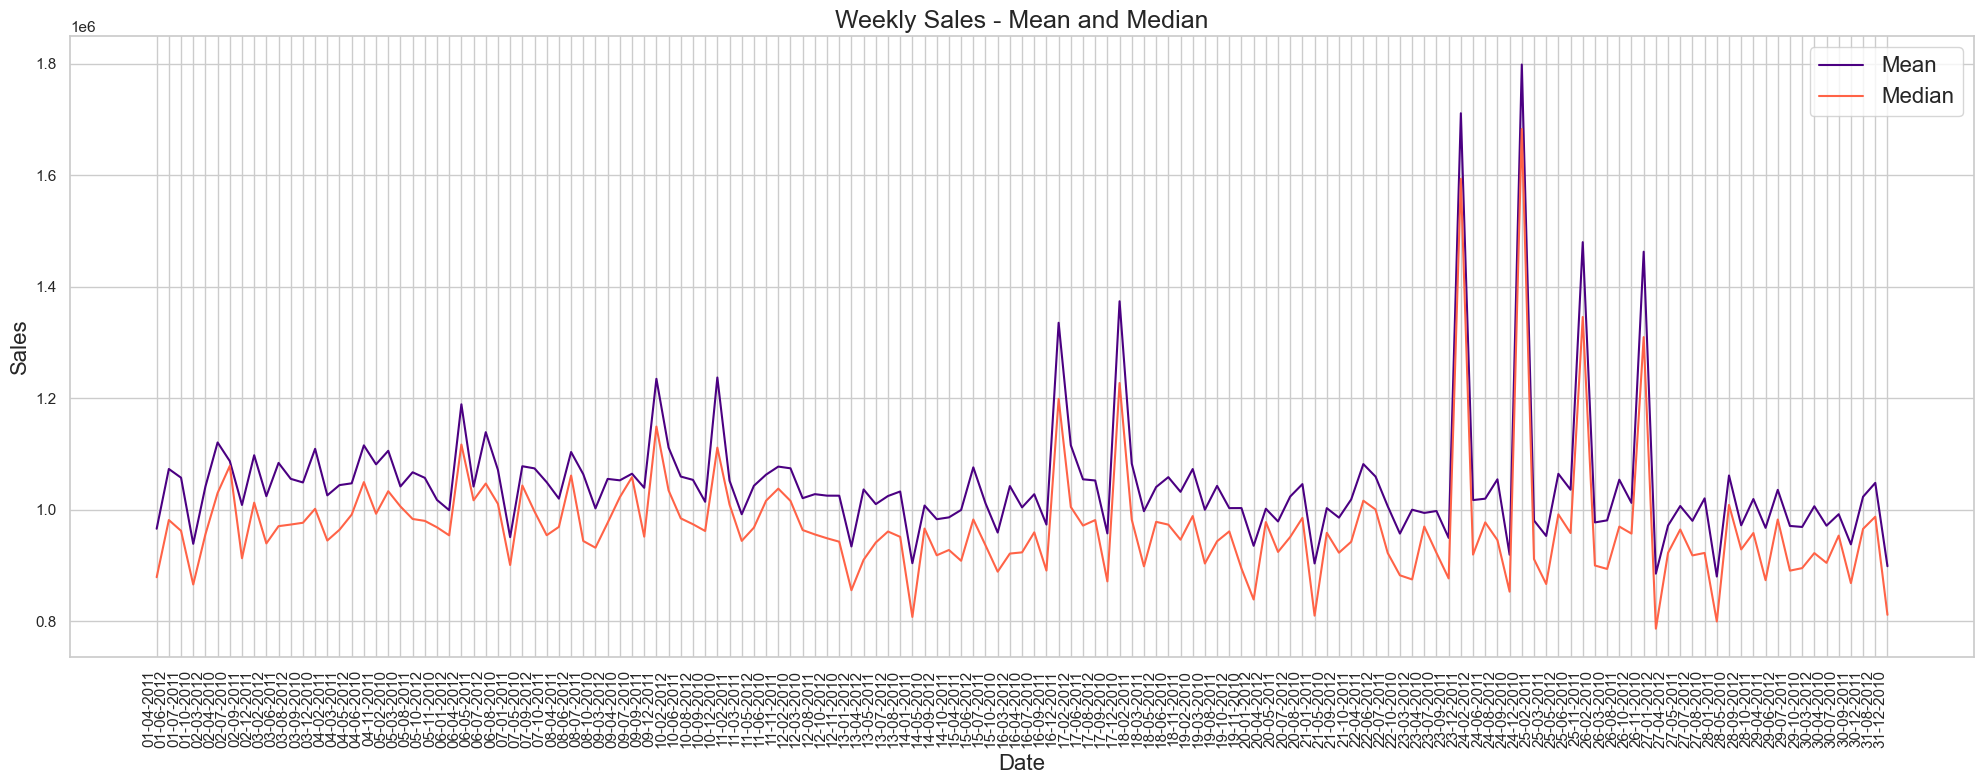

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

weekly_sales_mean = df['Weekly_Sales'].groupby(df['Date']).mean()
weekly_sales_median = df['Weekly_Sales'].groupby(df['Date']).median()

plt.figure(figsize=(20, 8))
sns.lineplot(x=weekly_sales_mean.index, y=weekly_sales_mean.values, color='indigo', label='Mean')
sns.lineplot(x=weekly_sales_median.index, y=weekly_sales_median.values, color='tomato', label='Median')

plt.grid(True)  # Added to display the grid
plt.legend(loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)

# Improve x-axis labels for readability
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


In [208]:
df1 = df.drop(['Date'],axis=1) # Dropping the date col as it is not required

In [209]:
df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


Text(0.5, 1.0, 'Monthly-wise sales')

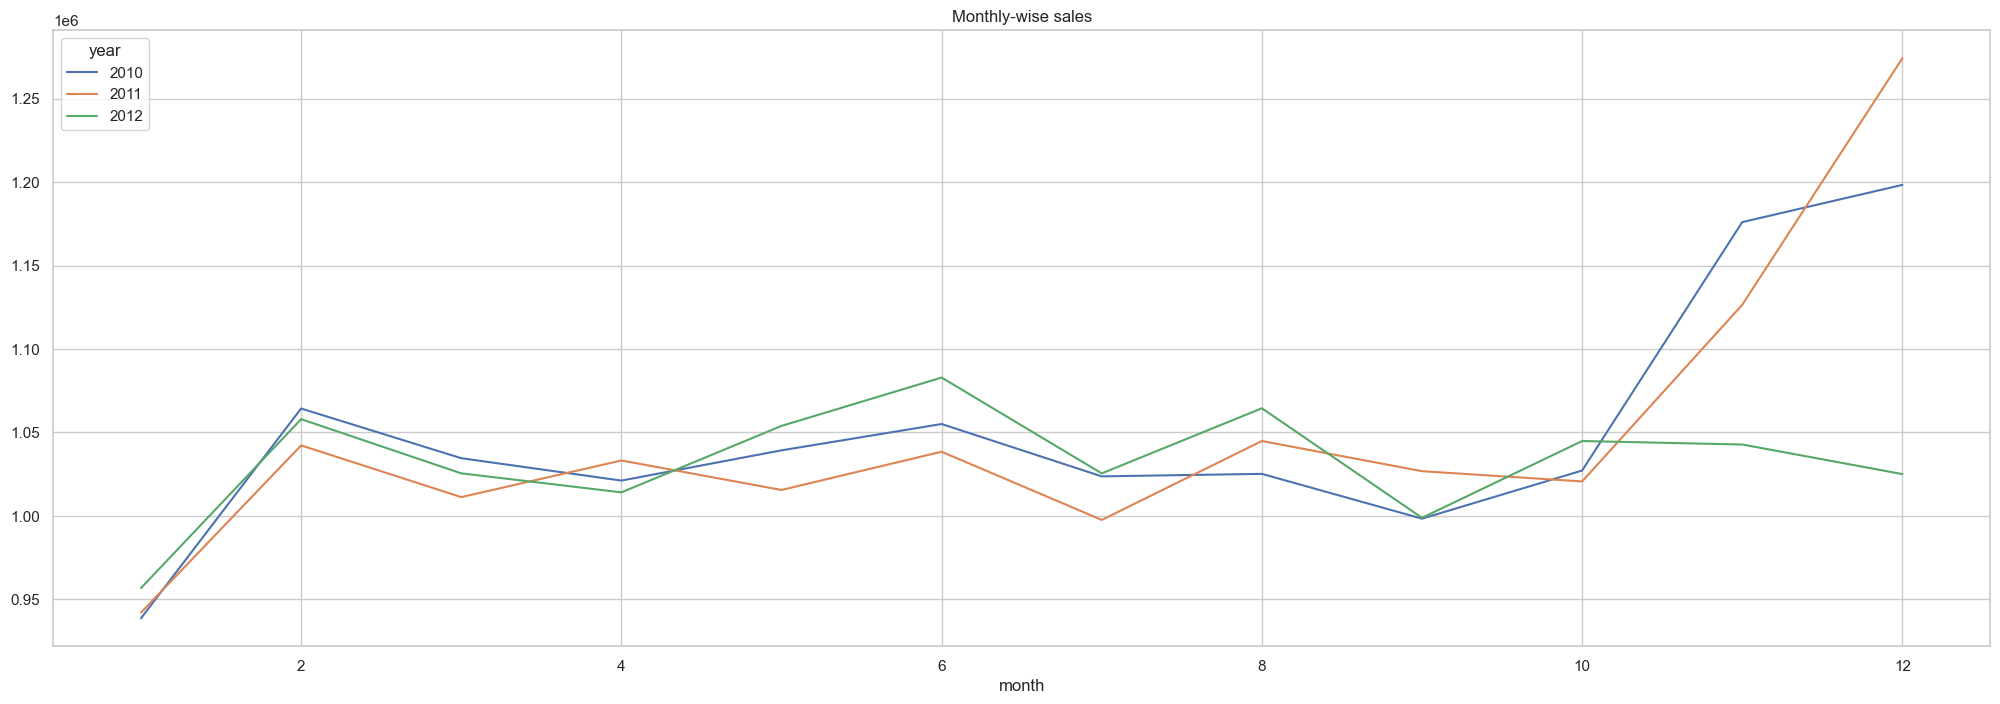

In [210]:
month_wise_sales = pd.pivot_table(df1, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()
plt.title("Monthly-wise sales")

#### Insights - Months 11 and 12 seem to have highest recorded weekly sales.

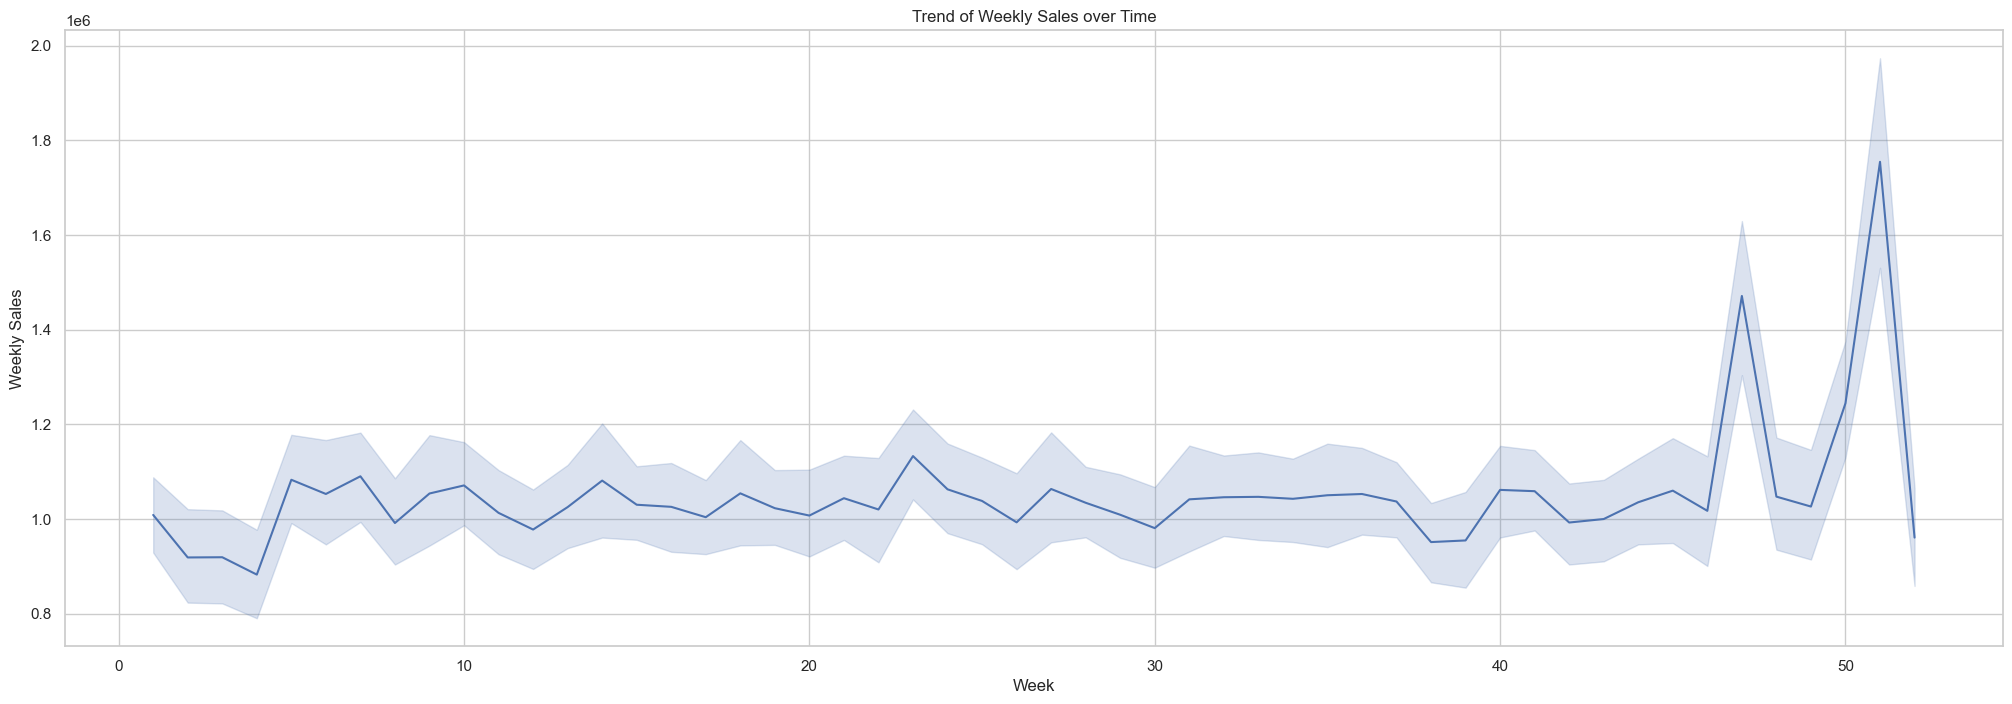

In [211]:
sns.lineplot(data=df, x='week', y='Weekly_Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Trend of Weekly Sales over Time')
plt.show()

#### Insights - There seems to be a major spike during Thanksgiving and Chrismas weeks

Common week numbers for holidays in all four years:

- Week 1: New Year's Day (2010, 2011, 2012, 2013)
- Week 3: Martin Luther King Jr. Day (2010, 2011, 2012)
- Week 6: Super Bowl
- Week 8: Presidents Day (2011, 2012, 2013)
- Week 22: Memorial Day (2010, 2011, 2012)
- Week 27: Independence Day (2010, 2011, 2012)
- Week 36: Labor Day (2010, 2011, 2012)
- Week 41: Columbus Day (2010, 2011, 2012)
- Week 46: Veterans Day (2010, 2011, 2012)
- Week 47: Thanksgiving Day (2010, 2011, 2012)
- Week 52: Christmas Day (2010, 2011, 2012, 2013)

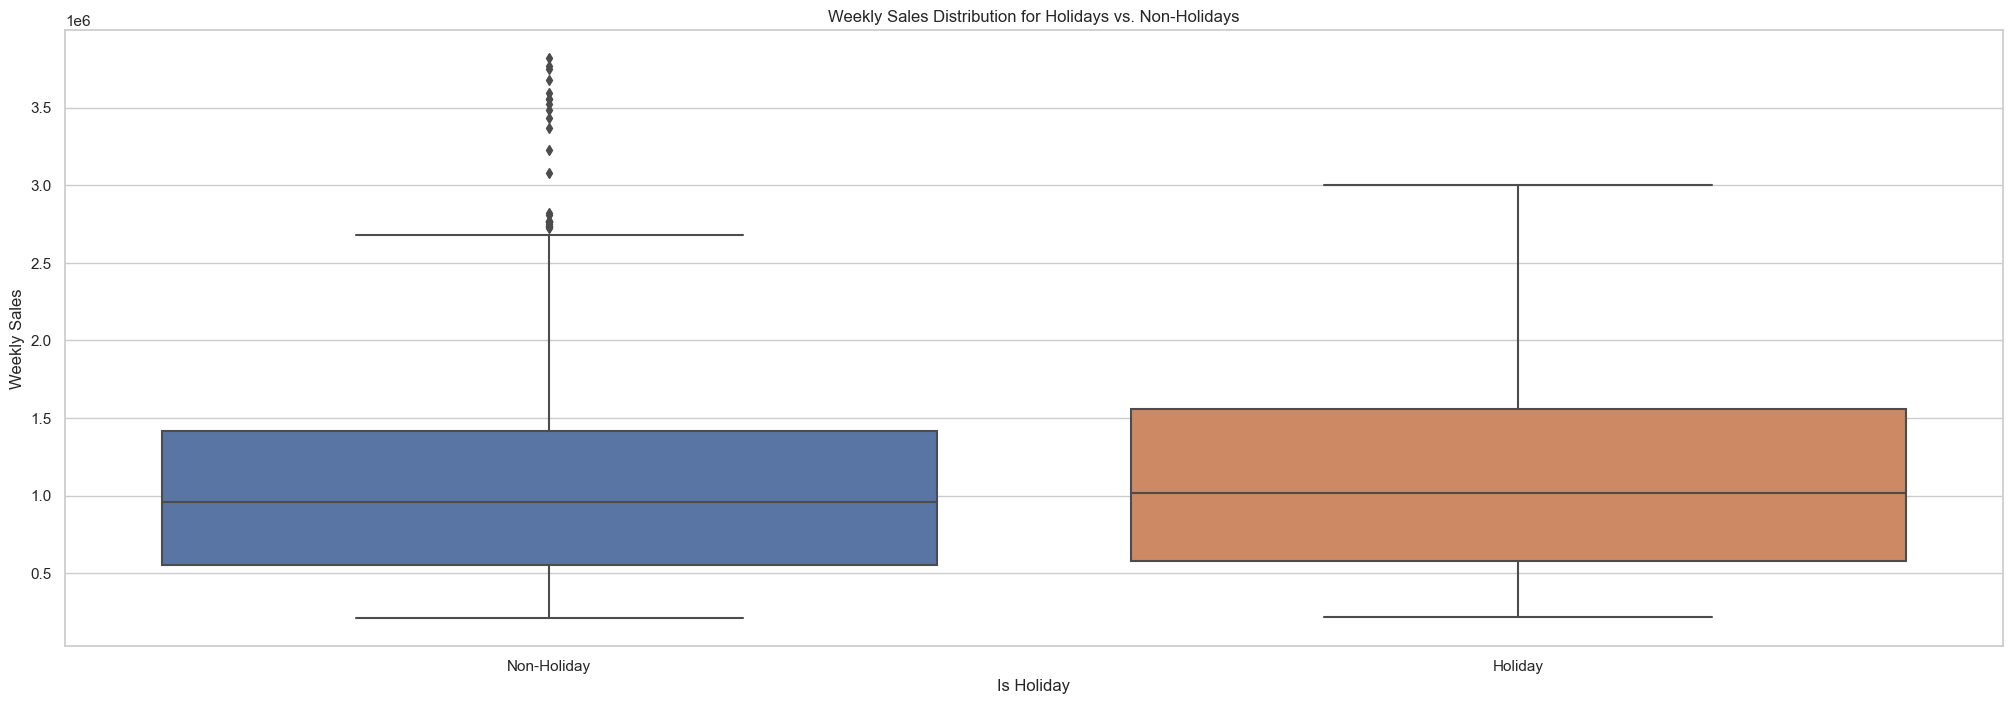

In [212]:
sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [213]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, x='Holiday_Flag', y='Weekly_Sales',
             labels={'Holiday_Flag': 'Is Holiday', 'Weekly_Sales': 'Weekly Sales'},
             title='Weekly Sales Distribution for Holidays vs. Non-Holidays',
             category_orders={'Holiday_Flag': ['0', '1']},
             width=600, height=400)

fig.update_xaxes(tickvals=[0, 1], ticktext=['Non-Holiday', 'Holiday'])

fig.show()


## Time Series Analysis:
We will consider some of the stores and perform a detailed time-series analysis on it.

In [29]:
df1["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### Lets take store 4 data for analysis:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("walmart.csv")


In [305]:
# Now converting "Date"  to date time
df["Date"]=pd.to_datetime(df.Date)

# Extracting details from date given so that can be used for seasonal checks or grouping

df["Day"]=df.Date.dt.day
df["Month"]=df.Date.dt.month
df["Year"]=df.Date.dt.year


In [306]:
df.set_index('Date', inplace=True)
store4 = df[df.Store == 4]
sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
#remove date from index to change its dtype 

<AxesSubplot: xlabel='Date'>

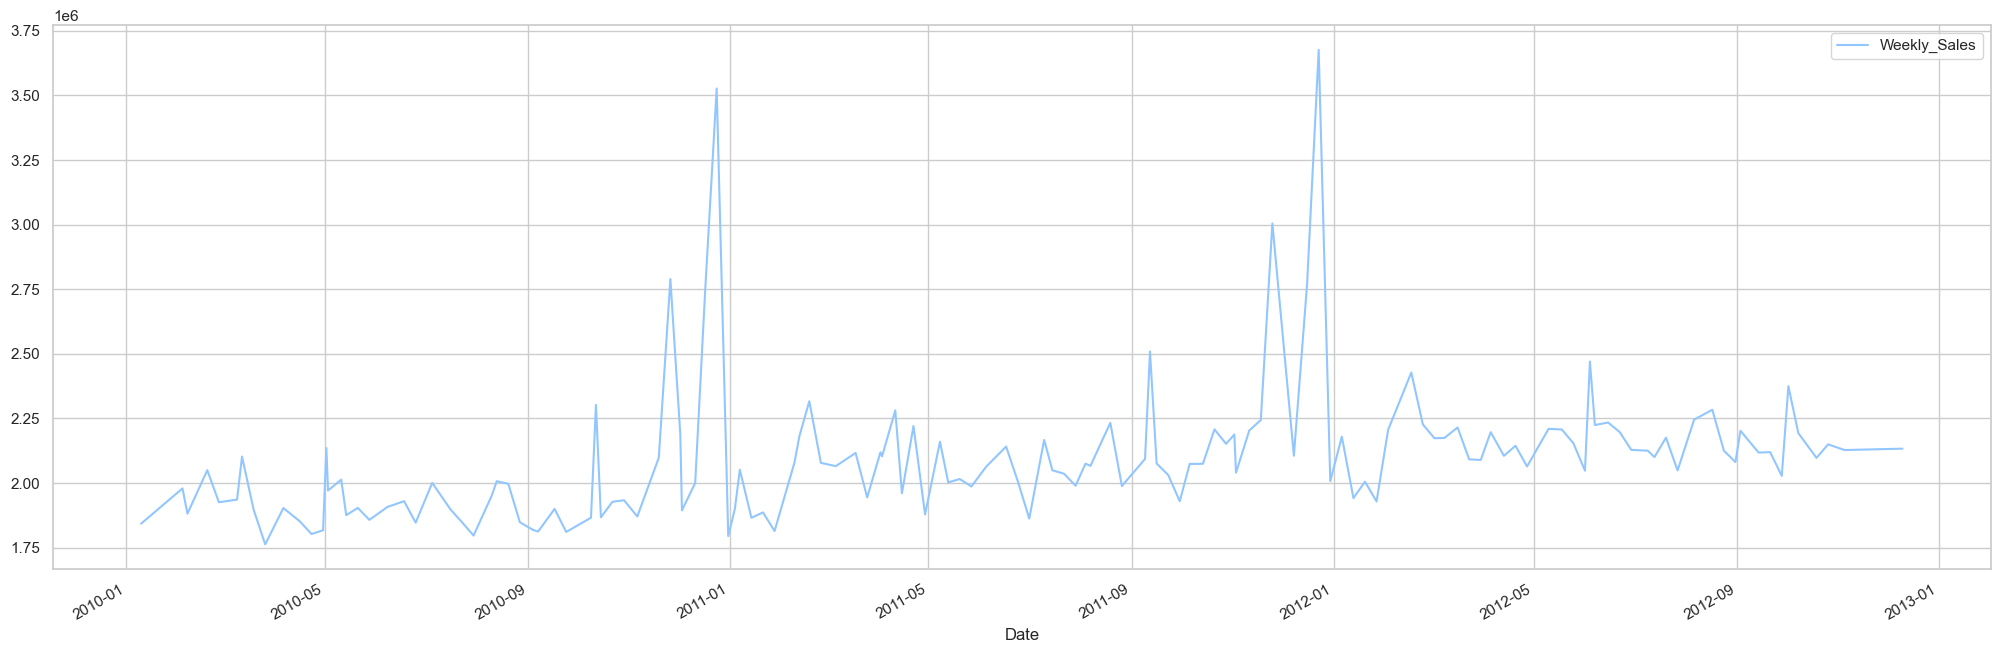

In [307]:
sales4.plot()

## Time series Decomposition for Store 4 :

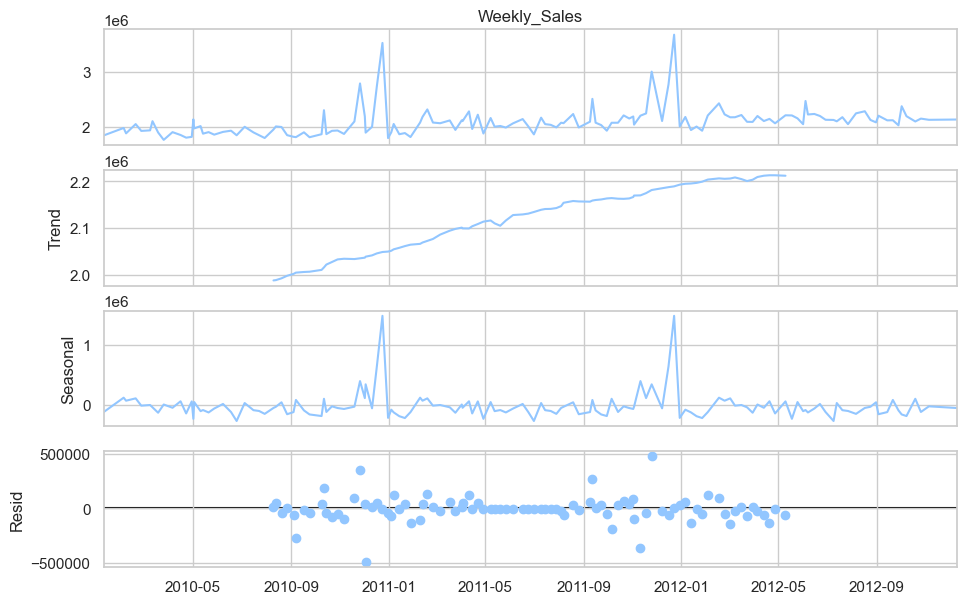

In [314]:
from statsmodels.tsa.seasonal import seasonal_decompose
sales4['Weekly_Sales'] = sales4['Weekly_Sales'].astype(float)  # Ensure the data type is float

# Specify the period for seasonal decomposition
decomposition = seasonal_decompose(sales4['Weekly_Sales'], period=52)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(9,6)
plt.show()

In [280]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [281]:
seasonal_pdq

[(0, 0, 0, 52),
 (0, 0, 1, 52),
 (0, 0, 2, 52),
 (0, 0, 3, 52),
 (0, 0, 4, 52),
 (0, 1, 0, 52),
 (0, 1, 1, 52),
 (0, 1, 2, 52),
 (0, 1, 3, 52),
 (0, 1, 4, 52),
 (0, 2, 0, 52),
 (0, 2, 1, 52),
 (0, 2, 2, 52),
 (0, 2, 3, 52),
 (0, 2, 4, 52),
 (0, 3, 0, 52),
 (0, 3, 1, 52),
 (0, 3, 2, 52),
 (0, 3, 3, 52),
 (0, 3, 4, 52),
 (0, 4, 0, 52),
 (0, 4, 1, 52),
 (0, 4, 2, 52),
 (0, 4, 3, 52),
 (0, 4, 4, 52),
 (1, 0, 0, 52),
 (1, 0, 1, 52),
 (1, 0, 2, 52),
 (1, 0, 3, 52),
 (1, 0, 4, 52),
 (1, 1, 0, 52),
 (1, 1, 1, 52),
 (1, 1, 2, 52),
 (1, 1, 3, 52),
 (1, 1, 4, 52),
 (1, 2, 0, 52),
 (1, 2, 1, 52),
 (1, 2, 2, 52),
 (1, 2, 3, 52),
 (1, 2, 4, 52),
 (1, 3, 0, 52),
 (1, 3, 1, 52),
 (1, 3, 2, 52),
 (1, 3, 3, 52),
 (1, 3, 4, 52),
 (1, 4, 0, 52),
 (1, 4, 1, 52),
 (1, 4, 2, 52),
 (1, 4, 3, 52),
 (1, 4, 4, 52),
 (2, 0, 0, 52),
 (2, 0, 1, 52),
 (2, 0, 2, 52),
 (2, 0, 3, 52),
 (2, 0, 4, 52),
 (2, 1, 0, 52),
 (2, 1, 1, 52),
 (2, 1, 2, 52),
 (2, 1, 3, 52),
 (2, 1, 4, 52),
 (2, 2, 0, 52),
 (2, 2, 1, 52),
 (2, 2, 

In [282]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(sales4,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5405      1.603     -0.961      0.337      -4.682       1.601
ar.L2         -1.4422      1.825     -0.790      0.429      -5.019       2.134
ar.L3         -0.8370      1.451     -0.577      0.564      -3.682       2.008
ar.L4         -0.2933      0.535     -0.549      0.583      -1.341       0.755
ma.L1         -1.6014      1.608     -0.996      0.319      -4.752       1.549
ma.L2          0.2446      3.172      0.077      0.939      -5.973       6.462
ma.L3          0.3625      1.594      0.227      0.820      -2.762       3.487
ar.S.L52      -0.4291      0.234     -1.836      0.066      -0.887       0.029
sigma2      1.894e+11   8.69e-11   2.18e+21      0.000    1.89e+11    1.89e+11


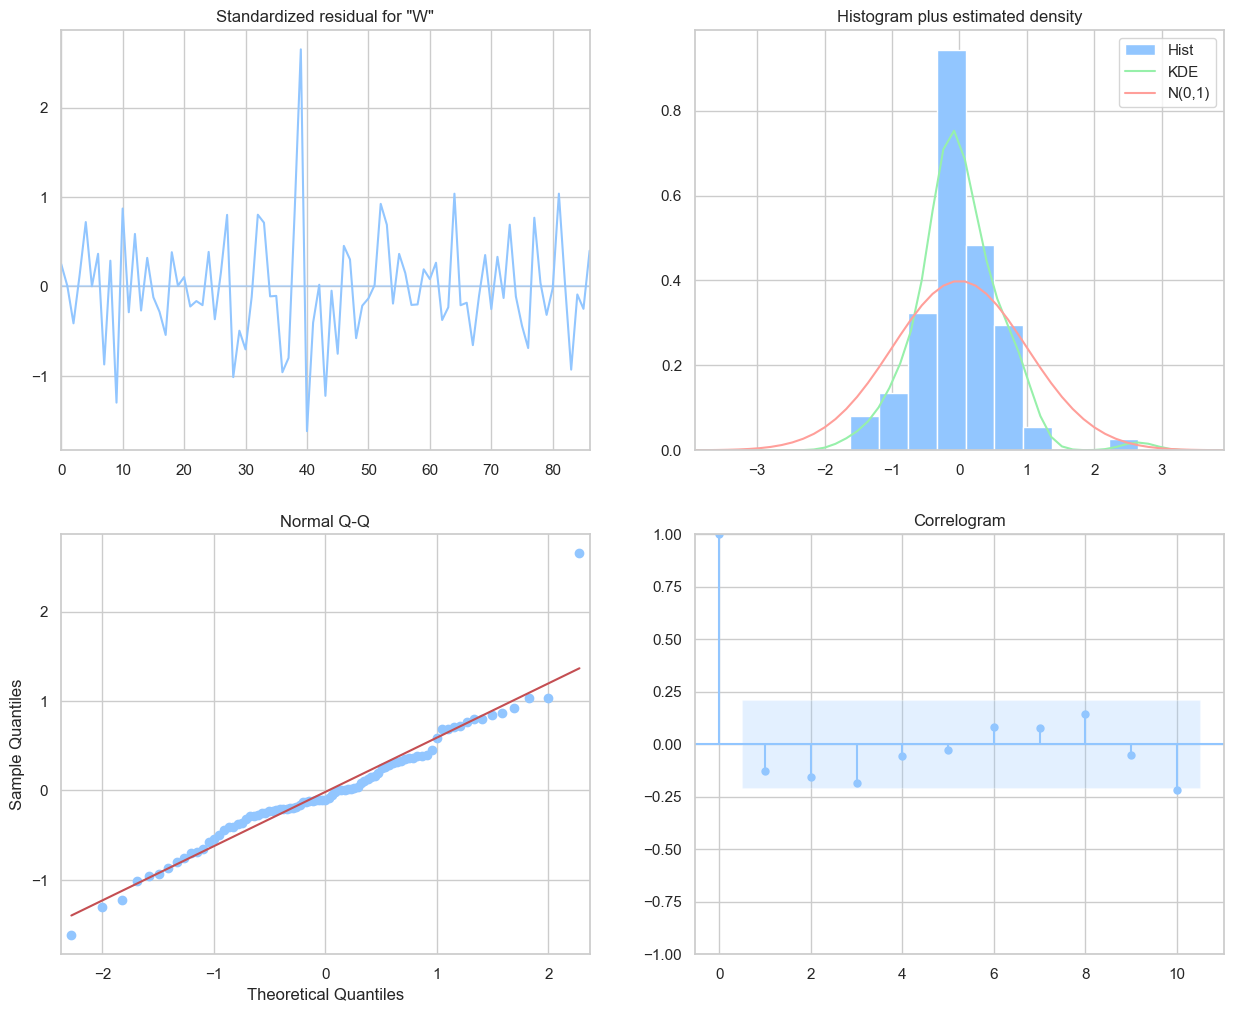

In [283]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [284]:
# Will predict for last 20 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-06-22'))
pred_ci = pred.conf_int()

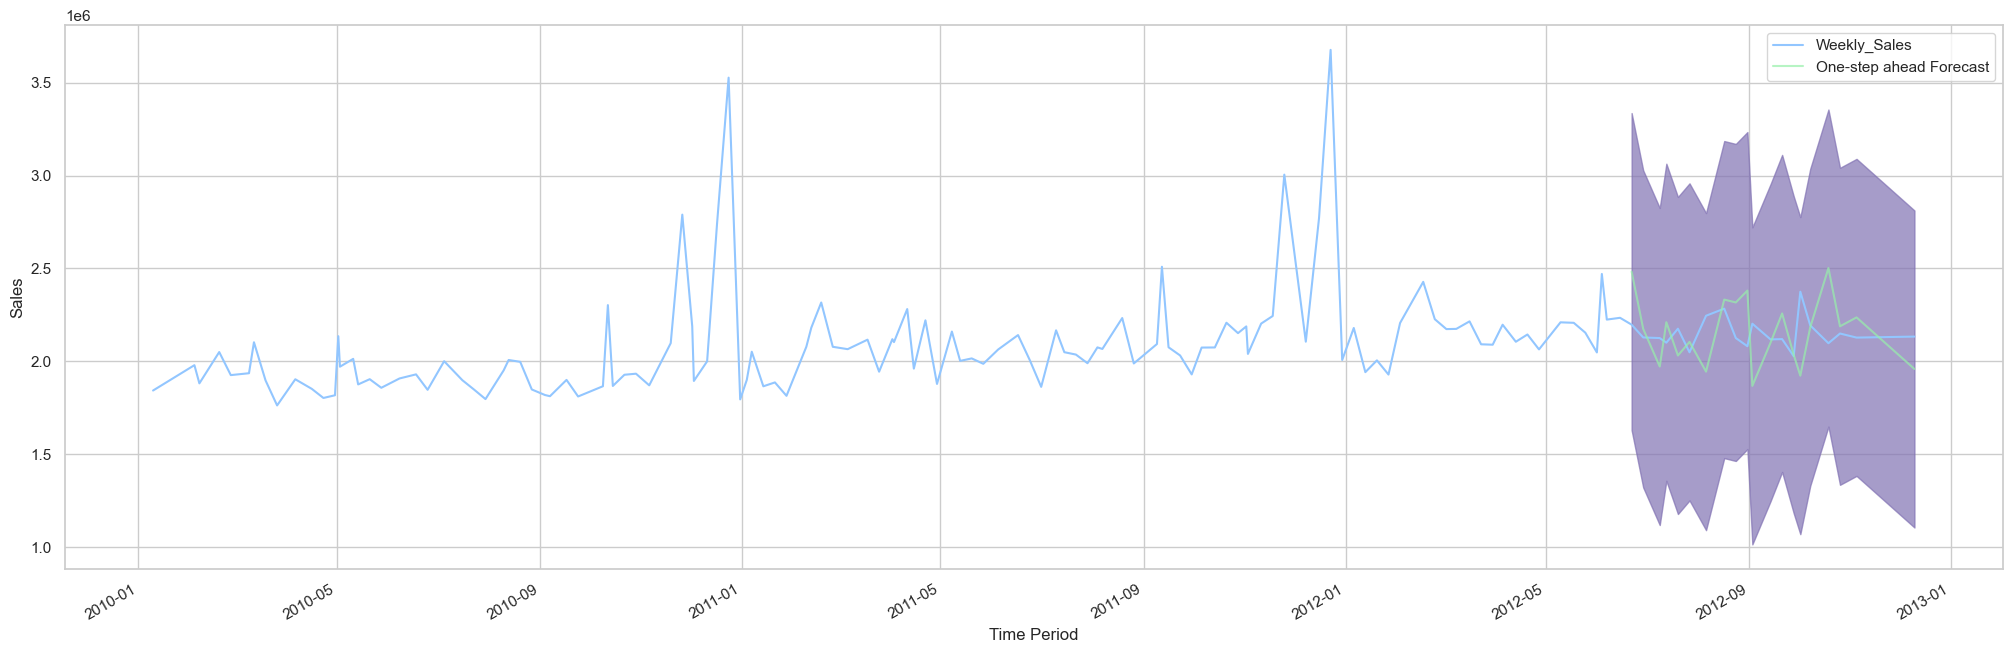

In [285]:
ax = sales4['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='m', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [288]:
y_forecasted = pred.predicted_mean
y_truth = sales4['2012-06-22':]

from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_forecasted and y_truth are pandas Series or DataFrames
# Convert them to numpy arrays for compatibility with mean_squared_error
y_forecasted_np = y_forecasted.to_numpy()
y_truth_np = y_truth.to_numpy()

# Calculate mean squared error
mse = mean_squared_error(y_truth_np, y_forecasted_np)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 212794.6705713732


In [289]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

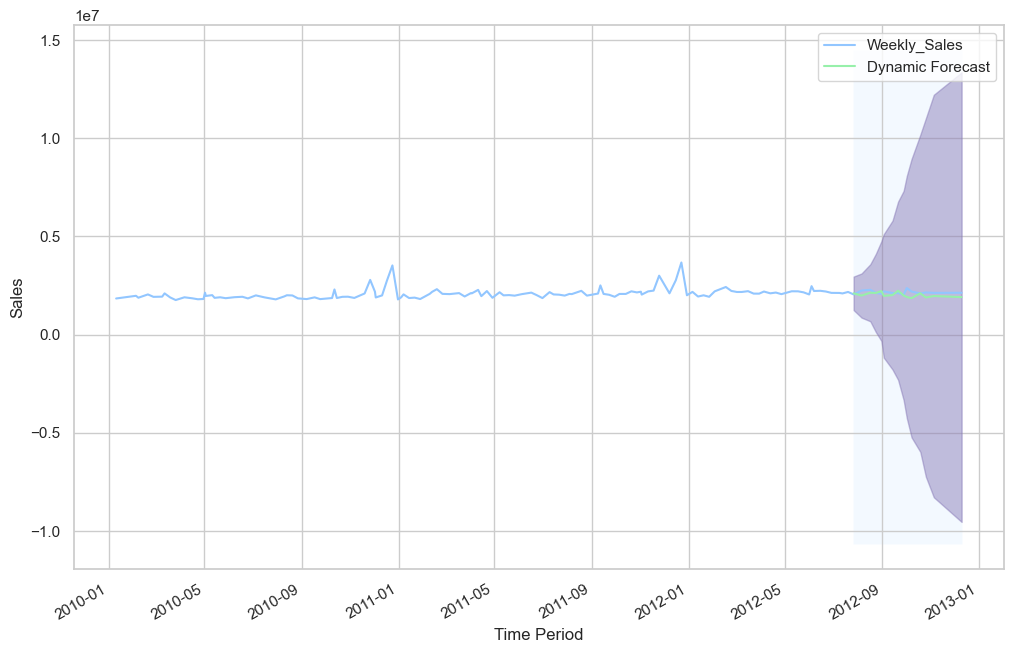

In [297]:
ax = sales4['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='m', alpha=.45)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), sales4.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [298]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = sales4['2012-7-27':]

from sklearn.metrics import mean_squared_error
import numpy as np

# Convert them to numpy arrays for compatibility with mean_squared_error
y_forecasted_np = y_forecasted.to_numpy()
y_truth_np = y_truth.to_numpy()

# Calculate mean squared error
mse = mean_squared_error(y_truth_np, y_forecasted_np)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 207715.79160606166


In [159]:
# Calculate residuals
residuals = y_forecasted - y_truth

residuals = y_forecasted.to_numpy() - y_truth.to_numpy()

# Print or analyze the residuals 
print("Residuals:")
print(np.abs(residuals).sum())



Residuals:
18847601.815793946


In [300]:
# Get forecast 12 weeks ahead in future
sarima_forecast = results.get_forecast(steps=12)

# Get the forecasted values and confidence intervals
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

In [301]:
sales4

,Weekly_Sales
Date,
2010-01-10,1842821.02
2010-02-04,1979247.12
2010-02-07,1881337.21
2010-02-19,2049860.26
2010-02-26,1925728.84
...,...
2012-10-08,2193367.69
2012-10-19,2097266.85
2012-10-26,2149594.46


In [303]:
# Create a date range for the forecasted values
forecast_dates = pd.date_range(start=sales4.index[-1] + timedelta(weeks=1), periods=12, freq='W')

<Figure size 1600x800 with 0 Axes>

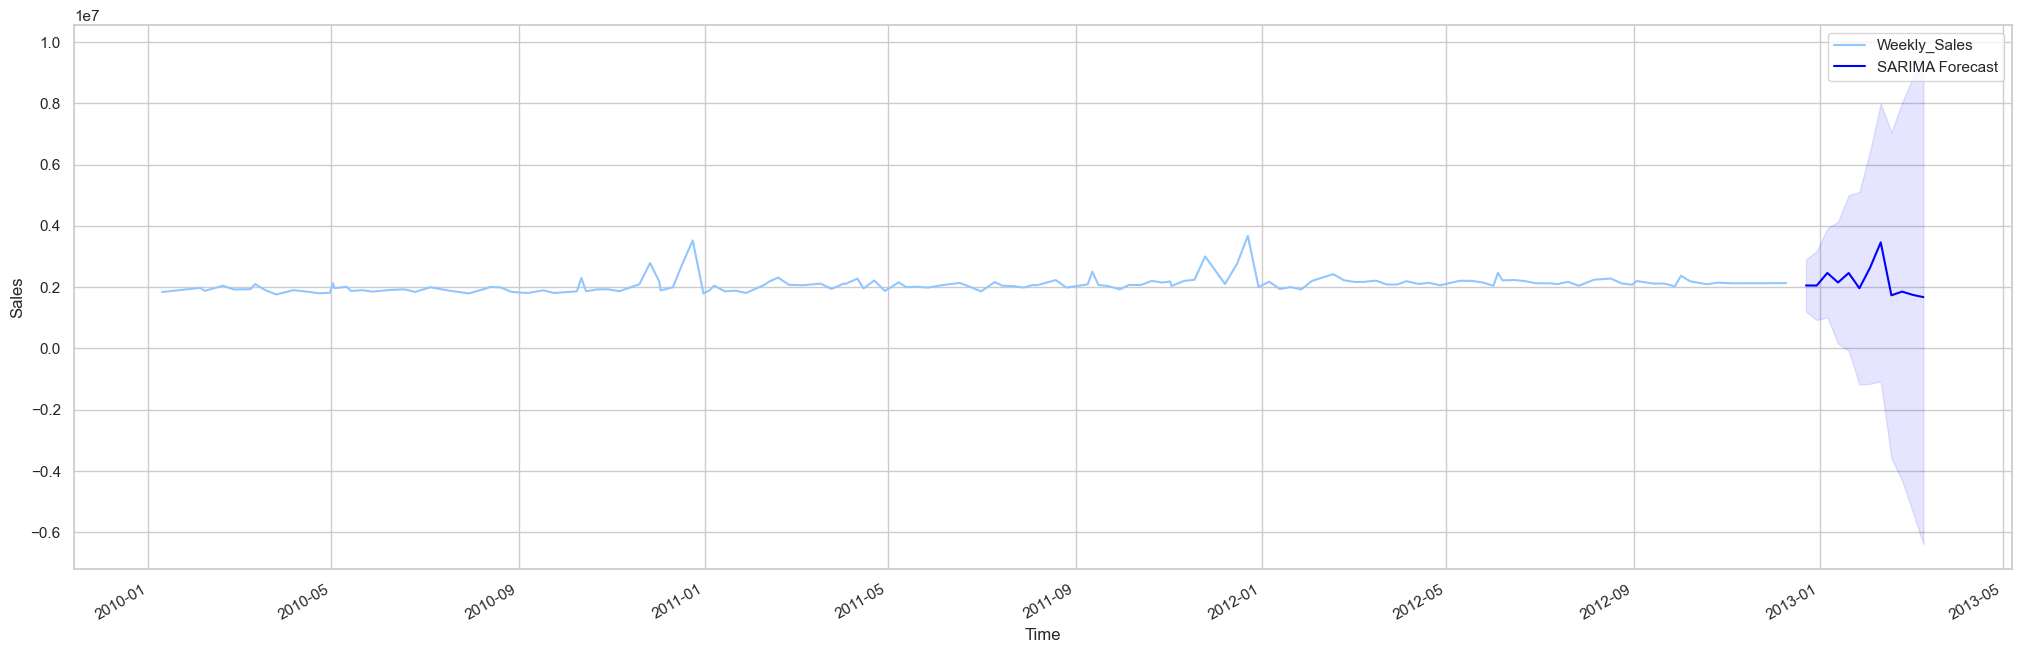

In [304]:
# Plot the forecasts and diagnostics
plt.figure(figsize=(16, 8))

# Plot observed sales
ax = sales4.plot(label='Observed Sales')

# Plot SARIMA forecast
plt.plot(forecast_dates, sarima_forecast_values, color='blue', label='SARIMA Forecast')
plt.fill_between(forecast_dates, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='blue', alpha=0.1)

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

## Lets take store 8 data for analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("walmart.csv")

In [7]:
# Now converting "Date"  to date time
df["Date"]=pd.to_datetime(df.Date)

# Extracting details from date given so that can be used for seasonal checks or grouping

df["Day"]=df.Date.dt.day
df["Month"]=df.Date.dt.month
df["Year"]=df.Date.dt.year

In [8]:
df.set_index('Date', inplace=True)
store8 = df[df.Store == 8]
sales8 = pd.DataFrame(store8.Weekly_Sales.groupby(store8.index).sum())
#remove date from index to change its dtype 

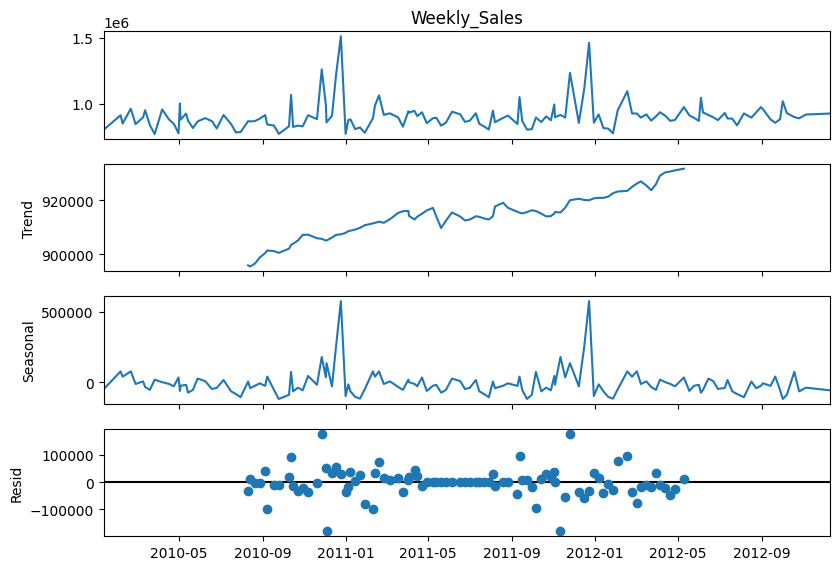

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
sales8['Weekly_Sales'] = sales8['Weekly_Sales'].astype(float)  # Ensure the data type is float

# Specify the period for seasonal decomposition
decomposition = seasonal_decompose(sales8['Weekly_Sales'], period=52)


# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(9,6)
plt.show()


In [12]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(sales8,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

D:\Python- Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python- Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python- Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7025      0.849     -2.006      0.045      -3.366      -0.039
ar.L2         -1.6235      0.952     -1.706      0.088      -3.489       0.242
ar.L3         -1.0596      0.854     -1.240      0.215      -2.734       0.615
ar.L4         -0.3963      0.371     -1.067      0.286      -1.124       0.331
ma.L1         -1.3552      0.928     -1.461      0.144      -3.173       0.463
ma.L2         -0.2276      1.774     -0.128      0.898      -3.704       3.249
ma.L3          0.5902      0.910      0.648      0.517      -1.194       2.375
ar.S.L52      -0.4772      0.188     -2.535      0.011      -0.846      -0.108
sigma2      3.839e+10   1.03e-11   3.74e+21      0.000    3.84e+10    3.84e+10


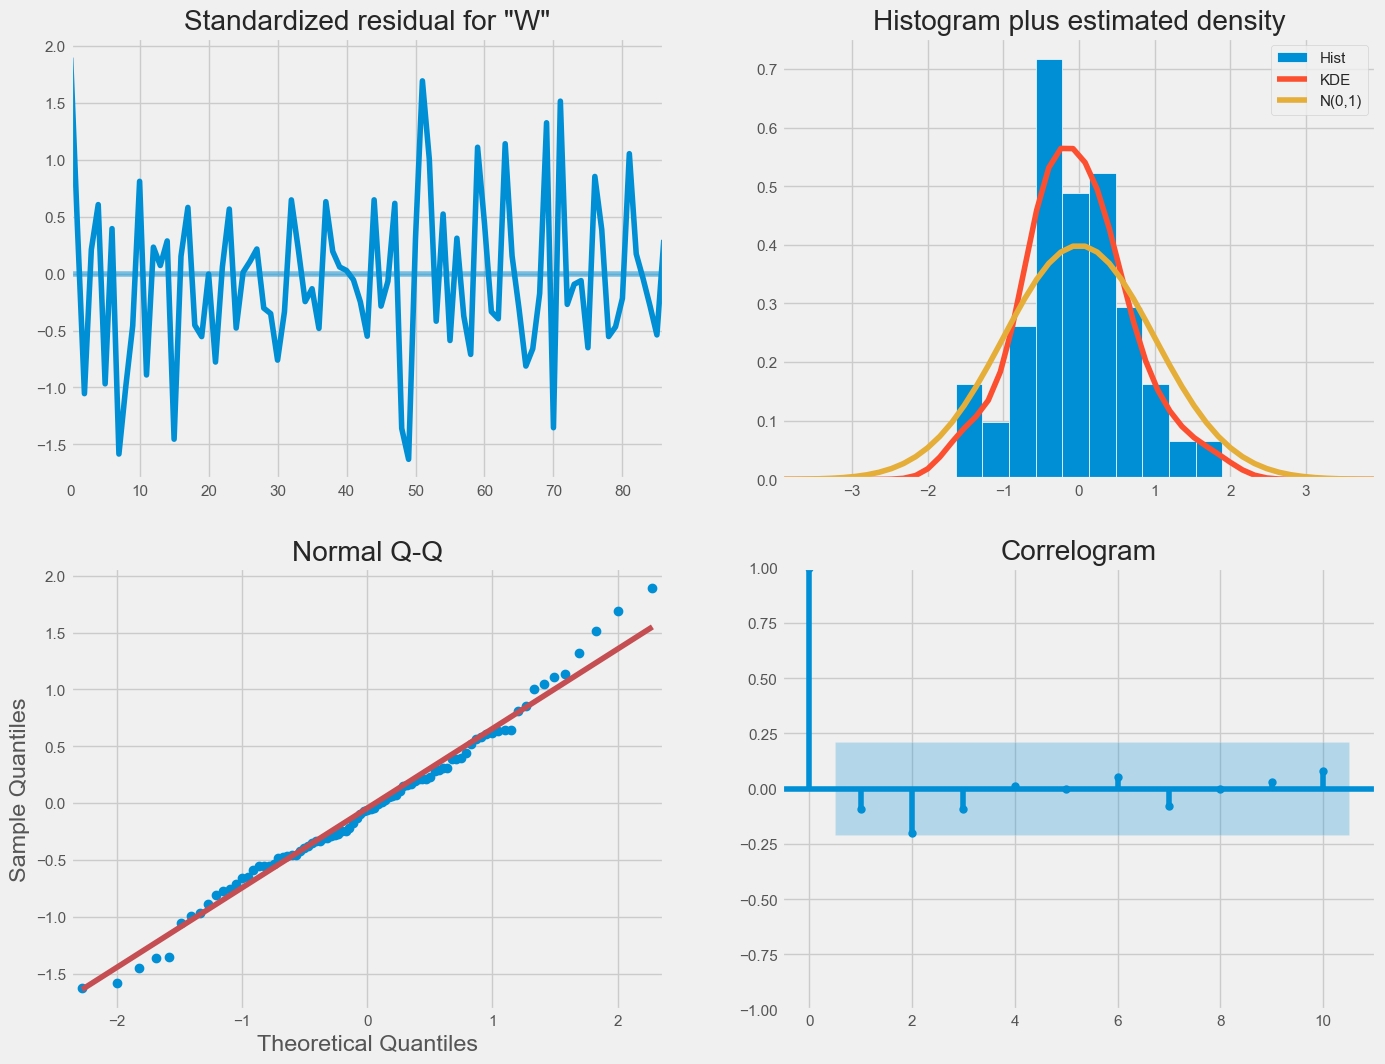

In [164]:
plt.style.use('fivethirtyeight')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [14]:
sales8.tail(20)

,Weekly_Sales
Date,
2012-06-22,899449.65
2012-06-29,878298.22
2012-07-09,932160.37
2012-07-13,890488.01
2012-07-20,888834.07
2012-07-27,838227.52
2012-08-06,928820.00
2012-08-17,896613.19
2012-08-24,936373.65


In [16]:
# Will predict for last 20 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-06-22'))
pred_ci = pred.conf_int()

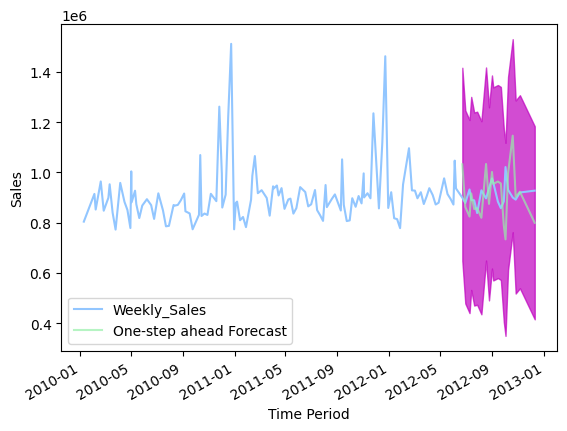

In [17]:
ax = sales8['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='m', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [19]:

y_forecasted = pred.predicted_mean
y_truth = sales8['2012-06-22':]

from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_forecasted and y_truth are pandas Series or DataFrames
# Convert them to numpy arrays for compatibility with mean_squared_error
y_forecasted_np = y_forecasted.to_numpy()
y_truth_np = y_truth.to_numpy()

# Calculate mean squared error
mse = mean_squared_error(y_truth_np, y_forecasted_np)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 113208.39098351244


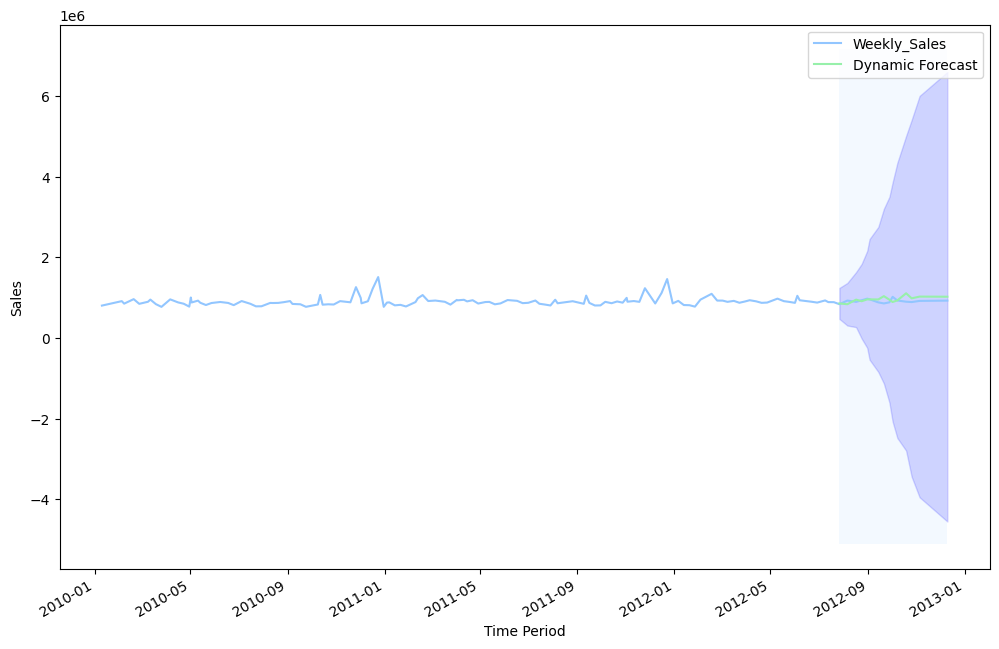

In [37]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = sales8['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='b', alpha=.15)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), sales4.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [21]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = sales8['2012-7-27':]

from sklearn.metrics import mean_squared_error
import numpy as np

# Convert them to numpy arrays for compatibility with mean_squared_error
y_forecasted_np = y_forecasted.to_numpy()
y_truth_np = y_truth.to_numpy()

# Calculate mean squared error
mse = mean_squared_error(y_truth_np, y_forecasted_np)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 98057.82231853223


In [22]:
# Calculate residuals
residuals = y_forecasted - y_truth

residuals = y_forecasted.to_numpy() - y_truth.to_numpy()

# Print or analyze the residuals as needed
print("Residuals:")
print(np.abs(residuals).sum())


Residuals:
16622387.837484453


In [25]:
# Get forecast 12 weeks ahead in future
sarima_forecast = results.get_forecast(steps=12)

# Get the forecasted values and confidence intervals
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

D:\Python- Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# Create a date range for the forecasted values
from datetime import timedelta 
forecast_dates = pd.date_range(start=sales8.index[-1] + timedelta(weeks=1), periods=12, freq='W')

<Figure size 1600x800 with 0 Axes>

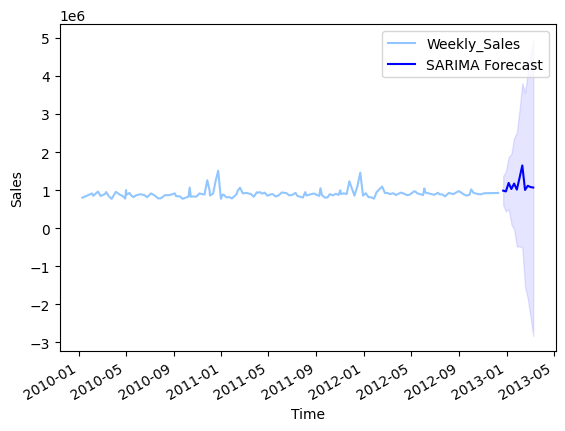

In [29]:
# Plot the forecasts and diagnostics
plt.figure(figsize=(16, 8))

# Plot observed sales
ax = sales8.plot(label='Observed Sales')

# Plot SARIMA forecast
plt.plot(forecast_dates, sarima_forecast_values, color='blue', label='SARIMA Forecast')
plt.fill_between(forecast_dates, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='blue', alpha=0.1)

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("walmart.csv")

In [39]:
# Now converting "Date"  to date time
df["Date"]=pd.to_datetime(df.Date)

# Extracting details from date given so that can be used for seasonal checks or grouping

df["Day"]=df.Date.dt.day
df["Month"]=df.Date.dt.month
df["Year"]=df.Date.dt.year


In [40]:
df.set_index('Date', inplace=True)
store38 = df[df.Store == 38]
sales38 = pd.DataFrame(store38.Weekly_Sales.groupby(store38.index).sum())
#remove date from index to change its dtype 

In [41]:
sales38

,Weekly_Sales
Date,
2010-01-10,360256.58
2010-02-04,368929.55
2010-02-07,361181.48
2010-02-19,327237.92
2010-02-26,334222.73
...,...
2012-10-08,436690.13
2012-10-19,428806.46
2012-10-26,417290.38


In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
sales38['Weekly_Sales'] = sales38['Weekly_Sales'].astype(float)  # Ensure the data type is float

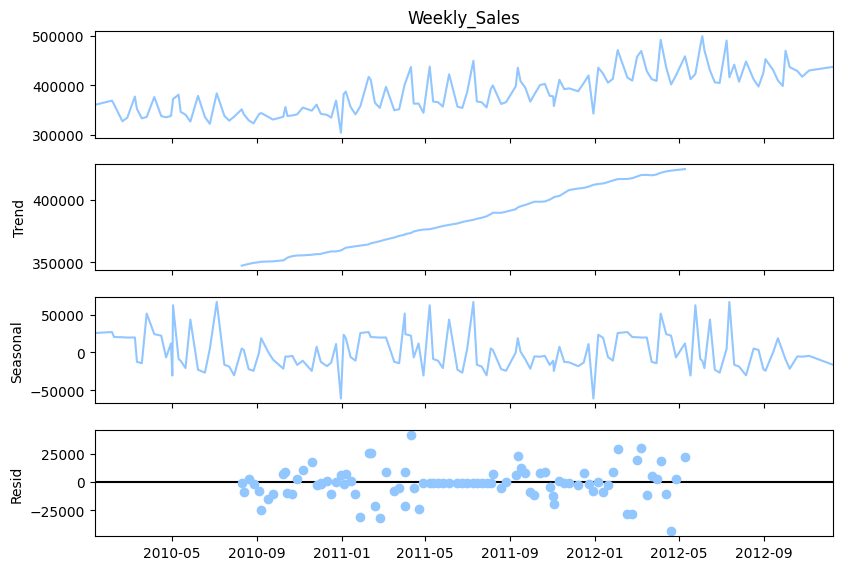

In [43]:
# Specify the period for seasonal decomposition
decomposition = seasonal_decompose(sales38['Weekly_Sales'], period=52)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(9,6)
plt.show()

In [44]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(sales38,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2137      0.825     -1.472      0.141      -2.830       0.403
ar.L2         -1.0251      0.720     -1.423      0.155      -2.437       0.386
ar.L3         -0.9212      0.548     -1.681      0.093      -1.995       0.153
ar.L4         -0.3465      0.454     -0.763      0.445      -1.236       0.543
ma.L1         -1.7819      0.883     -2.019      0.043      -3.512      -0.052
ma.L2          0.6120      1.789      0.342      0.732      -2.895       4.119
ma.L3          0.1753      0.944      0.186      0.853      -1.675       2.025
ar.S.L52      -0.3308      0.111     -2.973      0.003      -0.549      -0.113
sigma2      4.146e+09   9.48e-10   4.37e+18      0.000    4.15e+09    4.15e+09


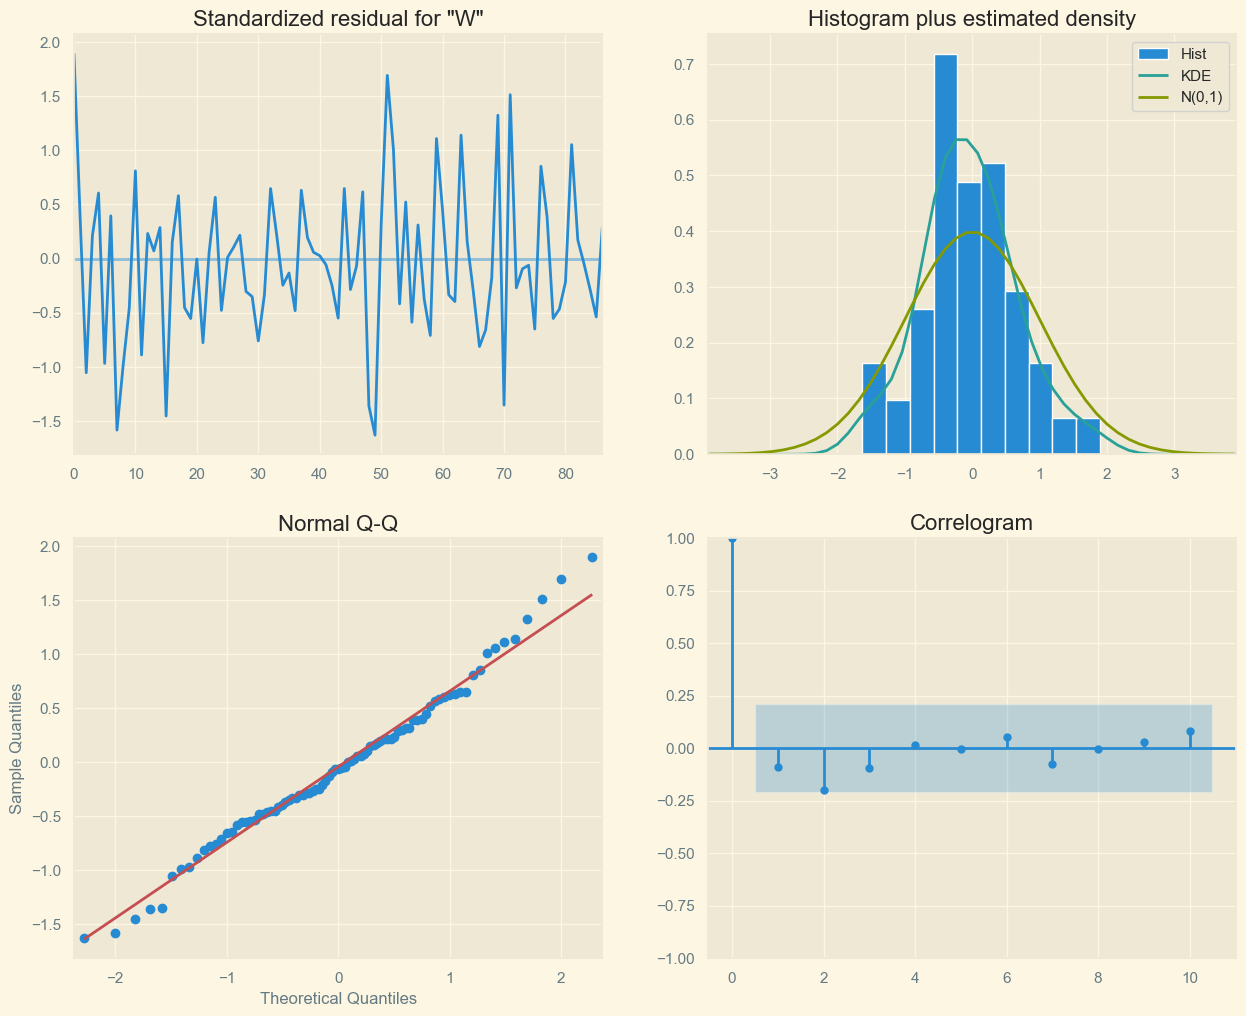

In [160]:
plt.style.use('Solarize_Light2')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [46]:
# Will predict for last 20 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-06-22'))
pred_ci = pred.conf_int()

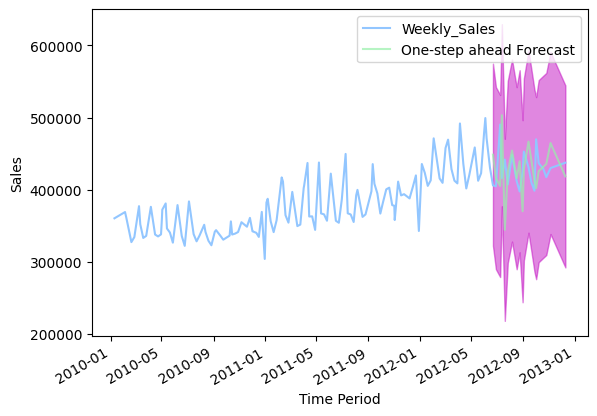

In [48]:
ax = sales38['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='m', alpha=.47)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = sales38['2012-06-22':]

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_forecasted and y_truth are pandas Series or DataFrames
# Convert them to numpy arrays for compatibility with mean_squared_error
y_forecasted_np = y_forecasted.to_numpy()
y_truth_np = y_truth.to_numpy()

# Calculate mean squared error
mse = mean_squared_error(y_truth_np, y_forecasted_np)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 45279.47862874689


In [51]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

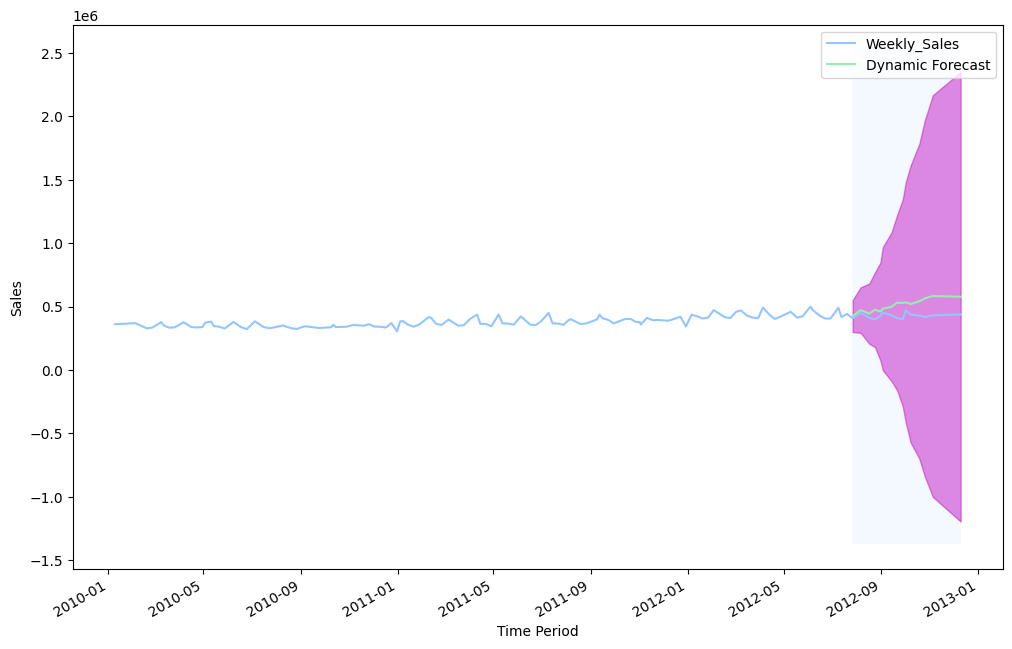

In [52]:
ax = sales38['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='m', alpha=.45)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), sales4.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [53]:

# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = sales38['2012-7-27':]

from sklearn.metrics import mean_squared_error

# Convert them to numpy arrays for compatibility with mean_squared_error
y_forecasted_np = y_forecasted.to_numpy()
y_truth_np = y_truth.to_numpy()

# Calculate mean squared error
mse = mean_squared_error(y_truth_np, y_forecasted_np)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 94507.72093763533


In [54]:
# Calculate residuals
residuals = y_forecasted - y_truth

residuals = y_forecasted.to_numpy() - y_truth.to_numpy()

# Print or analyze the residuals as needed
print("Residuals:")
print(np.abs(residuals).sum())

Residuals:
18847601.815793946


In [55]:
# Get forecast 12 weeks ahead in future
sarima_forecast = results.get_forecast(steps=12)

# Get the forecasted values and confidence intervals
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

In [56]:
# Create a date range for the forecasted values
forecast_dates = pd.date_range(start=sales38.index[-1] + timedelta(weeks=1), periods=12, freq='W')

<Figure size 1600x800 with 0 Axes>

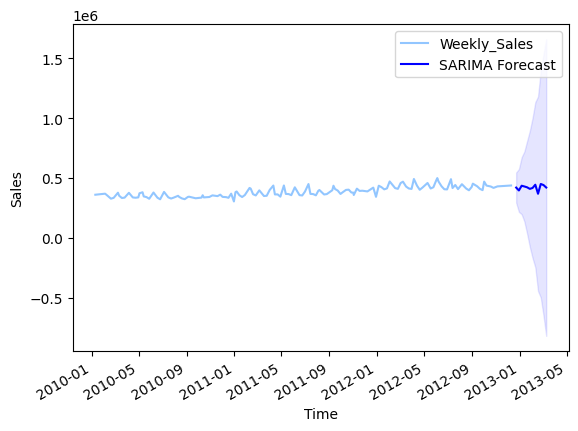

In [57]:
# Plot the forecasts and diagnostics
plt.figure(figsize=(16, 8))

# Plot observed sales
ax = sales38.plot(label='Observed Sales')

# Plot SARIMA forecast
plt.plot(forecast_dates, sarima_forecast_values, color='blue', label='SARIMA Forecast')
plt.fill_between(forecast_dates, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='blue', alpha=0.1)

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

#### Analyzing Weekly Sales Trends: Store 4 vs Store 38

In [165]:
y1=sales4.Weekly_Sales
y2=sales38.Weekly_Sales

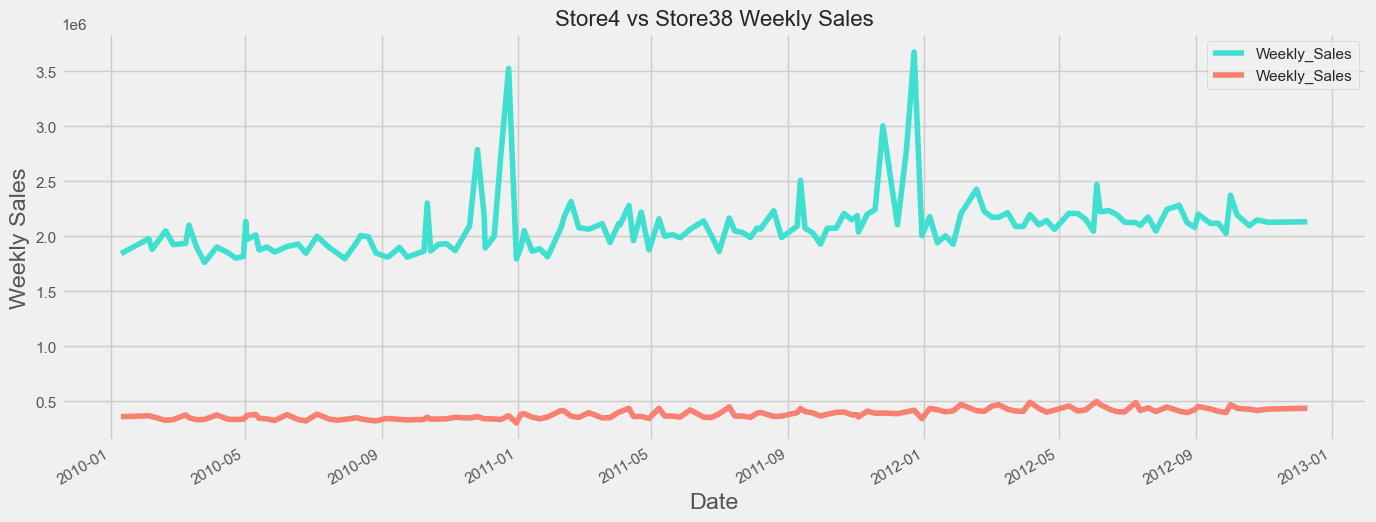

In [166]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store38 Weekly Sales', fontsize = '16')
plt.show()

#### Analyzing Weekly Sales Trends: Store 4 vs Store 8

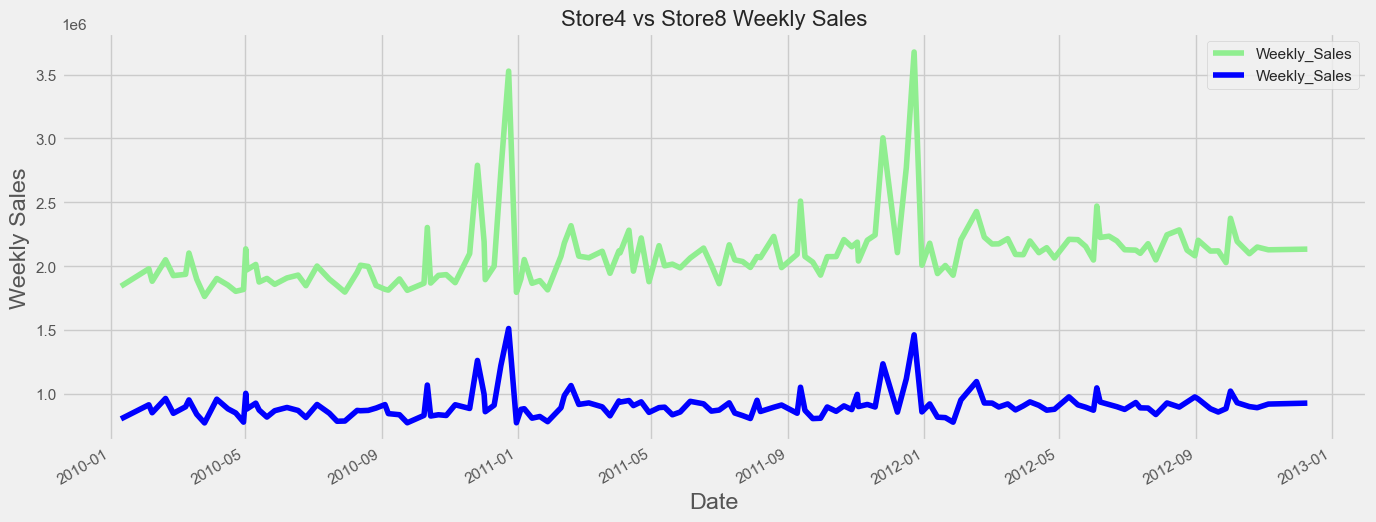

In [173]:
y3=sales4.Weekly_Sales
y4=sales8.Weekly_Sales

y3.plot(figsize=(15, 6), legend=True, color = 'lightgreen')
y4.plot(figsize=(15, 6), legend=True, color = 'blue')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store8 Weekly Sales', fontsize = '16')
plt.show()

#### Analyzing Weekly Sales Trends: Store 8 vs Store 38

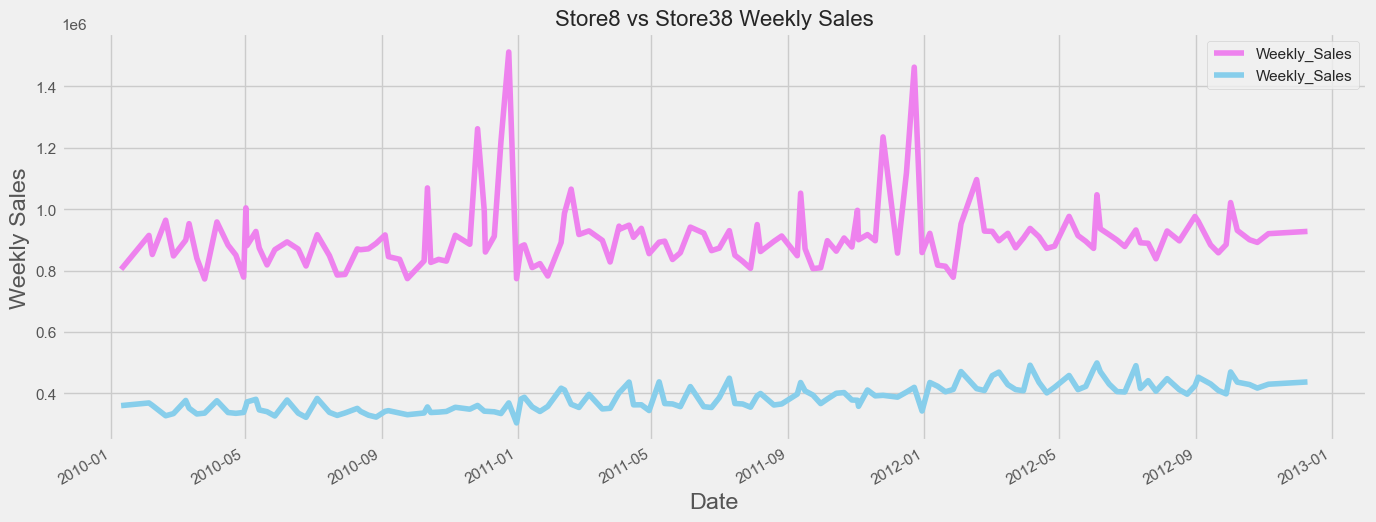

In [171]:
y5=sales8.Weekly_Sales
y6=sales38.Weekly_Sales
y5.plot(figsize=(15, 6), legend=True, color = 'violet')
y6.plot(figsize=(15, 6), legend=True, color = 'skyblue')
plt.ylabel('Weekly Sales')
plt.title('Store8 vs Store38 Weekly Sales', fontsize = '16')
plt.show()